In [ ]:
# Andrianov Daniil, CMC MSU student of 501 group
# "Forestry Model" practical work
# Subject: Multi-Objective Optimization Problem-solving Techniques
# 
# Problem conditions:
# x' = f(t, x)
# f(t, x) = g(t)*f(x) - u(t) 
# g(t) = 2*t^-0.8
# f(x) = x*e^-x/10

In [1]:
# Python libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
# Runge-Kutta method is not used because it takes too much time to calculate
def calc_x_runge_cutt(U, N, T, tau, massg):
    x = np.zeros(N)
    x[0] = 25.0
    1.0 / 0.0
    for i in range(1, N):
        k1 = massg[i-1] * (x[i-1] * np.exp(-0.1 * x[i-1])) - U[i-1]
        pow_g = 0.5*(massg[i-1] + massg[i])
        k2 = pow_g * ((x[i-1] + k1*(tau/2.0)) * np.exp(-0.1 * (x[i-1] + k1*tau/2.0))) - (U[i-1] + U[i])/2.0
        k3 = pow_g * ((x[i-1] + k2*(tau/2.0)) * np.exp(-0.1 * (x[i-1] + k2*tau/2.0))) - (U[i-1] + U[i])/2.0
        k4 = massg[i] * ((x[i-1] + k3*tau) * np.exp(-0.1 * (x[i-1] + k3*tau))) - U[i]
        x[i] = x[i-1] + (tau / 6.0) * (k1 + 2.0*k2 + 2.0*k3 + k4)
    return x

In [3]:
# Euler method is easier and takes less time to calculate 
def eyler_solver(U, N, T, tau, massg):
    x = np.zeros(N)
    x[0] = 25.0
    for i in range(1, N):
        x[i] = x[i-1] + tau*(massg[i-1] * (x[i-1] * np.exp(-0.1 * x[i-1])) - U[i-1])
    return x

In [4]:
# J functional calculation (three integrals calculation)
def calc_J(U, N, T, tau, integral_1, massg):
    in_integral_3 = eyler_solver(U, N, T, tau, massg) - 20.0 * np.ones(N)
    integral_3 = np.ones(N)
    integral_3[0] = 0.5
    integral_3[-1] = 0.5
    first = -2.0 * np.dot(integral_1, U)
    second = np.dot(integral_1, U)
    third = np.dot(integral_3, in_integral_3 * in_integral_3) * tau
    return (first, second, third)

In [1]:
# J functional calculation with lyambdas (if you arrange lambdas differently, then it's hard to parameterize the task)
# l1 (lyamdba_1) - parameter showing how important it is to preserve the forest
# l2 (lyambda_2) - parameter showing how important the profit is
# l1 != 0, l2 != 0
def calc_J_with_l(U, N, T, tau, l1, l2, integral_1, massg):
    first, second, third = calc_J(U, N, T, tau, integral_1, massg)
    return  l2 * first + (1.0 - l1 - l2) * second + l1 * third

In [6]:
# g(t) function
def g_in_diff_eq(t):
    return 2.0 * np.power(t + 5.0, -0.8);

In [12]:
# Optimal J functional searching
def optimal_J(N, tau, T, l1, l2, integral_for_1, mass_of_g):
    U_init = 0.2 * np.ones(N)
    opt = minimize(calc_J_with_l, U_init, method='SLSQP', tol=0.1*tau*tau,  args=(N, T, tau, l1, l2, integral_for_1, mass_of_g),
                   bounds=[(0.0, 15.0 / float(0.1 * i + 1.0)) for i in range(0, N)], options={'disp': True}) 
    return opt.x

## Task

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2.737539783843856
            Iterations: 41
            Function evaluations: 14434
            Gradient evaluations: 41


Text(0.5, 0.98, 'J functional value:(-24.015402444126952, 12.007701222063476, 3.3482563855044165)')

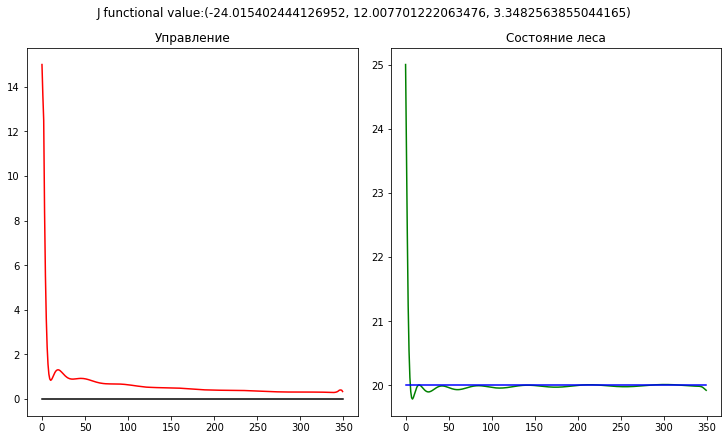

In [ ]:
# Values setting and getting the first results
# l1 = l2 = 0.33
T = 35.0
tau = 0.1
N = int(T / tau)
integral1 = np.array([tau * np.exp(- i * tau * 0.1) for i in range(0, N)])
integral1[0] *= 0.5
integral1[-1] *= 0.5
mass_g = np.array([g_in_diff_eq(tau * i) for i in range(0, N)])
res_1 = optimal_J(N, tau, T, 0.33, 0.33, integral1, mass_g)

# Graphs
fg = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fg.add_gridspec(1, 2)
ax_1 = fg.add_subplot(gs[0,0])
ax_1.set_title('Управление')
ax_2 = fg.add_subplot(gs[0,1])
ax_2.set_title('Состояние леса')
ax_1.plot(res_1, color='red')
ax_1.plot(np.zeros(N), color='black')
ax_2.plot(eyler_solver(res_1, N, T, tau, mass_g), color='green')
ax_2.plot(20*np.ones(N), color='blue')
fg.suptitle('J functional value:' + str(calc_J(res_1, N, T, tau, integral1, mass_g)))

## T = 35

In [ ]:
T = 35.0
tau = 0.1
N = int(T / tau)
integral1 = np.array([tau * np.exp(- i * tau * 0.1) for i in range(0, N)])
integral1[0] *= 0.5
integral1[-1] *= 0.5
mass_g = np.array([g_in_diff_eq(tau * i) for i in range(0, N)])
mass_of_res = []
numL2 = 8
for la_1 in np.linspace(0.2, 0.8, 8):
    for la_2 in np.linspace(0.1, 1.0 - la_1, numL2):
        tmp_res = optimal_J(N, tau, T, la_1, la_2, integral1, mass_g)
        mass_of_res.append(tmp_res)
    numL2 -= 1

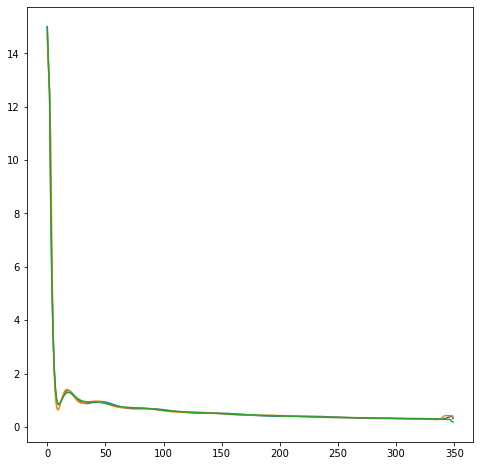

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(10, len(mass_of_res), 10):
    ax.plot(mass_of_res[i])

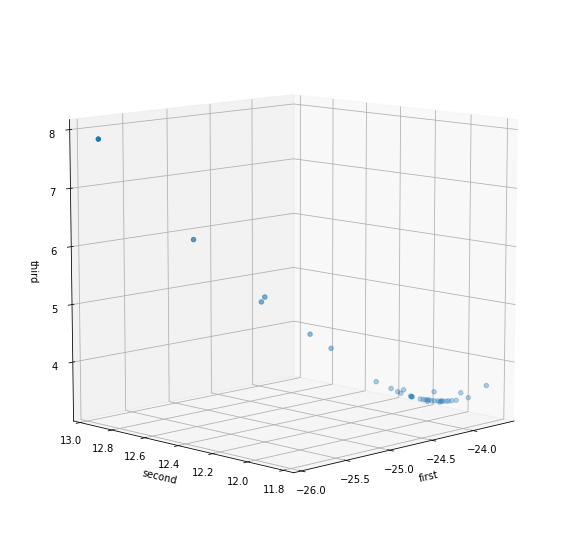

In [ ]:
# Results demonstration
# Checking that these are the Slater points
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X, Y, Z = [], [], []
for tmpres in mass_of_res:
    x, y, z = calc_J(tmpres, N, T, tau, integral1, mass_g)
    X.append(x)
    Y.append(y)
    Z.append(z)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10, 180+45)
ax.set_xlabel('first')
ax.set_ylabel('second')
ax.set_zlabel('third')
ax.scatter(X, Y, Z)

## T = 42

In [ ]:
T = 42.0
tau = 0.1
N = int(T / tau)
integral1 = np.array([tau * np.exp(- i * tau * 0.1) for i in range(0, N)])
integral1[0] *= 0.5
integral1[-1] *= 0.5
mass_g = np.array([g_in_diff_eq(tau * i) for i in range(0, N)])
mass_of_res = []
numL2 = 8
for la_1 in np.linspace(0.2, 0.8, 8):
    for la_2 in np.linspace(0.1, 1.0 - la_1, numL2):
        tmp_res = optimal_J(N, tau, T, la_1, la_2, integral1, mass_g)
        mass_of_res.append(tmp_res)
    numL2 -= 1

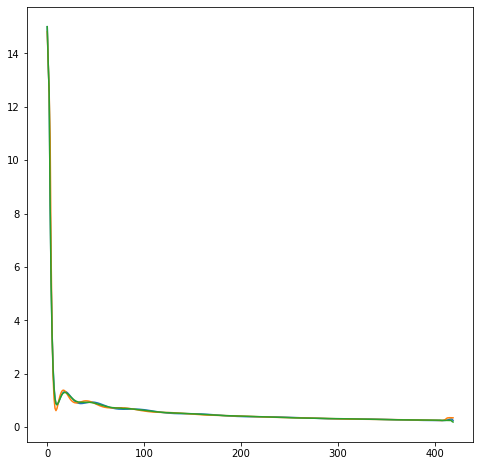

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(10, len(mass_of_res), 10):
    ax.plot(mass_of_res[i])

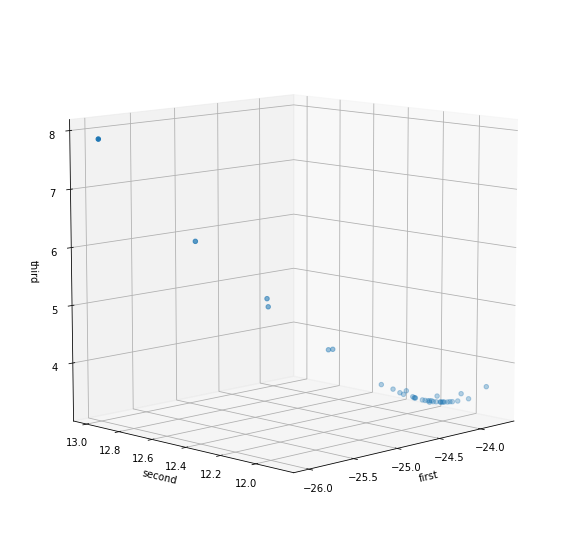

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X, Y, Z = [], [], []
for tmpres in mass_of_res:
    x, y, z = calc_J(tmpres, N, T, tau, integral1, mass_g)
    X.append(x)
    Y.append(y)
    Z.append(z)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10, 180+45)
ax.set_xlabel('first')
ax.set_ylabel('second')
ax.set_zlabel('third')
ax.scatter(X, Y, Z)

## T = 49

In [ ]:
T = 49.0
tau = 0.1
N = int(T / tau)
integral1 = np.array([tau * np.exp(- i * tau * 0.1) for i in range(0, N)])
integral1[0] *= 0.5
integral1[-1] *= 0.5
mass_g = np.array([g_in_diff_eq(tau * i) for i in range(0, N)])
mass_of_res = []
numL2 = 8
for la_1 in np.linspace(0.2, 0.8, 8):
    for la_2 in np.linspace(0.1, 1.0 - la_1, numL2):
        tmp_res = optimal_J(N, tau, T, la_1, la_2, integral1, mass_g)
        mass_of_res.append(tmp_res)
    numL2 -= 1

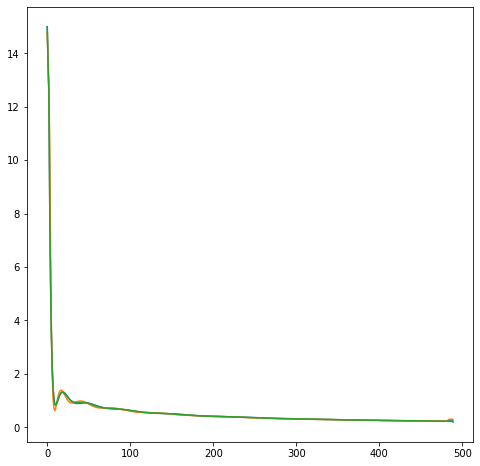

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(10, len(mass_of_res), 10):
    ax.plot(mass_of_res[i])

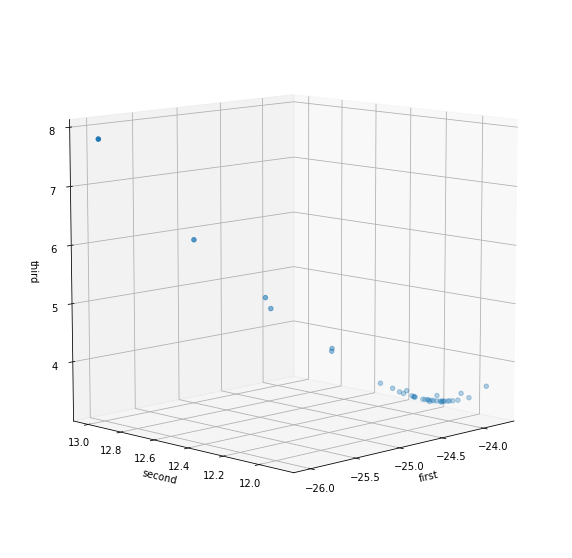

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X, Y, Z = [], [], []
for tmpres in mass_of_res:
    x, y, z = calc_J(tmpres, N, T, tau, integral1, mass_g)
    X.append(x)
    Y.append(y)
    Z.append(z)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10, 180+45)
ax.set_xlabel('first')
ax.set_ylabel('second')
ax.set_zlabel('third')
ax.scatter(X, Y, Z)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


Iteration limit exceeded    (Exit mode 9)
            Current function value: 3.2785900237854464
            Iterations: 101
            Function evaluations: 35556
            Gradient evaluations: 101


Text(0.5, 0.98, 'J functional value:(-23.92166015036569, 11.960830075182844, 3.2785900237854464)')

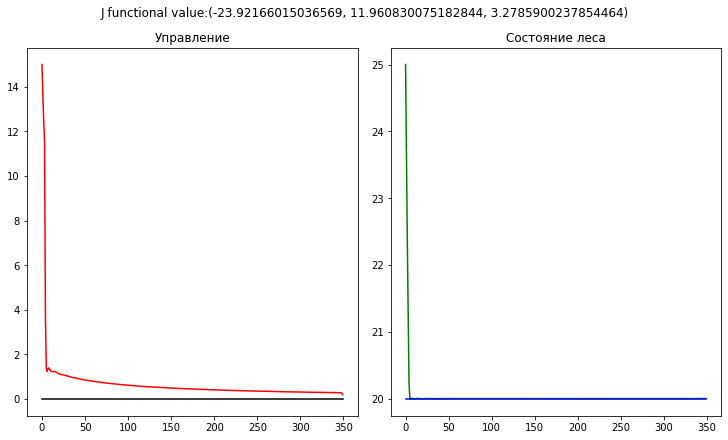

In [11]:
#l1 = 1 - a case when it is important to preserve the forest
T = 35.0
tau = 0.1
N = int(T / tau)
integral1 = np.array([tau * np.exp(- i * tau * 0.1) for i in range(0, N)])
integral1[0] *= 0.5
integral1[-1] *= 0.5
mass_g = np.array([g_in_diff_eq(tau * i) for i in range(0, N)])
res_1 = optimal_J(N, tau, T, 1.0, 0.0, integral1, mass_g)
# Graphs
fg = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fg.add_gridspec(1, 2)
ax_1 = fg.add_subplot(gs[0,0])
ax_1.set_title('Управление')
ax_2 = fg.add_subplot(gs[0,1])
ax_2.set_title('Состояние леса')
ax_1.plot(res_1, color='red')
ax_1.plot(np.zeros(N), color='black')
ax_2.plot(eyler_solver(res_1, N, T, tau, mass_g), color='green')
ax_2.plot(20*np.ones(N), color='blue')
fg.suptitle('J functional value:' + str(calc_J(res_1, N, T, tau, integral1, mass_g)))